<a href="https://colab.research.google.com/github/orifelszer/CrimeData/blob/eden-branch/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import os
import zipfile

# ◊î◊ï◊®◊ì◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊û◊î-GitHub
!git clone https://github.com/orifelszer/CrimeData.git

# ◊î◊í◊ì◊®◊™ ◊î◊™◊ô◊ß◊ô◊ô◊î ◊ú◊ê◊ó◊® ◊î◊î◊ï◊®◊ì◊î
zip_folder = 'CrimeData'

# ◊î◊í◊ì◊®◊™ ◊†◊™◊ô◊ë◊ô◊ù ◊ô◊©◊ô◊®◊ô◊ù ◊ú◊©◊†◊ô ◊î◊ß◊ë◊¶◊ô◊ù
zip_files = [
    os.path.join(zip_folder, 'Clean_data_unsupervised_part1.zip'),
    os.path.join(zip_folder, 'Clean_data_unsupervised_part2.zip')
]

# ◊®◊©◊ô◊û◊î ◊ú◊©◊û◊ô◊®◊™ ◊†◊™◊ô◊ë◊ô ◊î◊ß◊ë◊¶◊ô◊ù ◊©◊†◊§◊®◊°◊ï
extracted_folders = []

# ◊§◊®◊ô◊°◊™ ◊ß◊ë◊¶◊ô ◊î-ZIP
for zip_file in zip_files:
    extract_path = zip_file.replace('.zip', '')  # ◊ô◊¶◊ô◊®◊™ ◊©◊ù ◊™◊ô◊ß◊ô◊ô◊î ◊ú◊§◊ô ◊©◊ù ◊î◊ß◊ï◊ë◊•

    # ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊ß◊ï◊ë◊• ◊ß◊ô◊ô◊ù
    if os.path.exists(zip_file):
        # ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊™◊ô◊ß◊ô◊ô◊î ◊õ◊ë◊® ◊†◊§◊®◊°◊î
        if not os.path.exists(extract_path):
            with zipfile.ZipFile(zip_file, 'r') as zip_ref:
                zip_ref.extractall(extract_path)
            print(f"Extracted: {zip_file} -> {extract_path}")
        else:
            print(f"Skipped: {zip_file} (Already extracted)")
    else:
        print(f"File not found: {zip_file}")

    extracted_folders.append(extract_path)

# ◊ê◊ô◊ó◊ï◊ì ◊ß◊ë◊¶◊ô CSV ◊©◊§◊ï◊®◊°◊ï
dataframes = []

for folder in extracted_folders:
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        if file_name.endswith('.csv'):
            df_temp = pd.read_csv(file_path)
            dataframes.append(df_temp)

# ◊ê◊ô◊ó◊ï◊ì ◊õ◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú◊û◊°◊í◊®◊™ ◊†◊™◊ï◊†◊ô◊ù ◊ê◊ó◊™
combined_df = pd.concat(dataframes, ignore_index=True)

# ◊î◊¶◊í◊™ ◊û◊°◊í◊®◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ê◊ï◊ó◊ì◊™
print(f"Combined dataset contains {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")

Cloning into 'CrimeData'...
remote: Enumerating objects: 898, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 898 (delta 265), reused 149 (delta 149), pack-reused 554 (from 1)
Receiving objects: 100% (898/898), 298.67 MiB | 32.90 MiB/s, done.
Resolving deltas: 100% (474/474), done.
Extracted: CrimeData/Clean_data_unsupervised_part1.zip -> CrimeData/Clean_data_unsupervised_part1
Extracted: CrimeData/Clean_data_unsupervised_part2.zip -> CrimeData/Clean_data_unsupervised_part2
Combined dataset contains 1686927 rows and 19 columns.


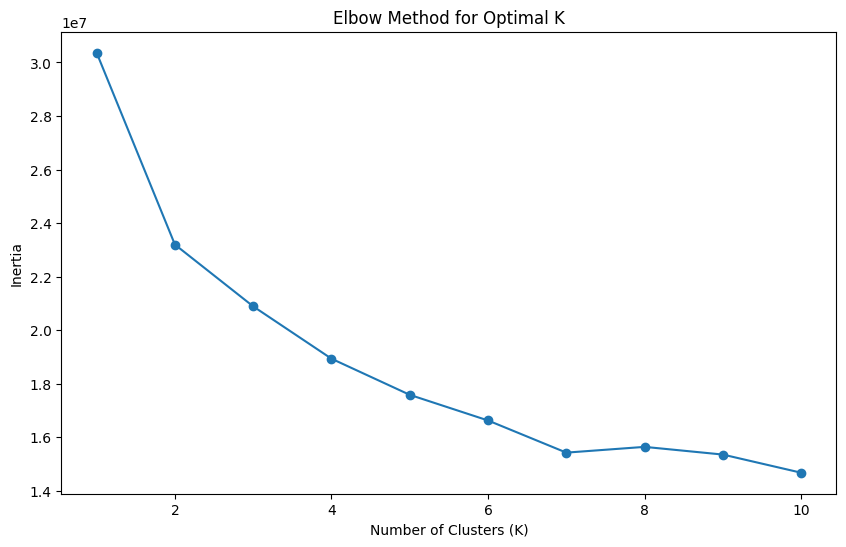

In [3]:
# ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊™ ◊î◊û◊ñ◊î◊î ◊¢◊ë◊ï◊® ◊ê◊©◊õ◊ï◊ú◊ï◊™
df_kmeans = combined_df.drop(columns=['FictiveIDNumber'])

# ◊ë◊ô◊¶◊ï◊¢ ◊°◊ò◊†◊ì◊®◊ò◊ô◊ñ◊¶◊ô◊î ◊¢◊ú ◊î◊†◊™◊ï◊†◊ô◊ù (◊ó◊©◊ï◊ë ◊¢◊ë◊ï◊® K-Means)
scaler = StandardScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans)

# ◊ë◊ó◊ô◊†◊™ ◊û◊°◊§◊® ◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊û◊™◊ê◊ô◊ù ◊ë◊ê◊û◊¶◊¢◊ï◊™ Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans_scaled)
    inertia.append(kmeans.inertia_)

# ◊î◊¶◊í◊™ ◊í◊®◊£ Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


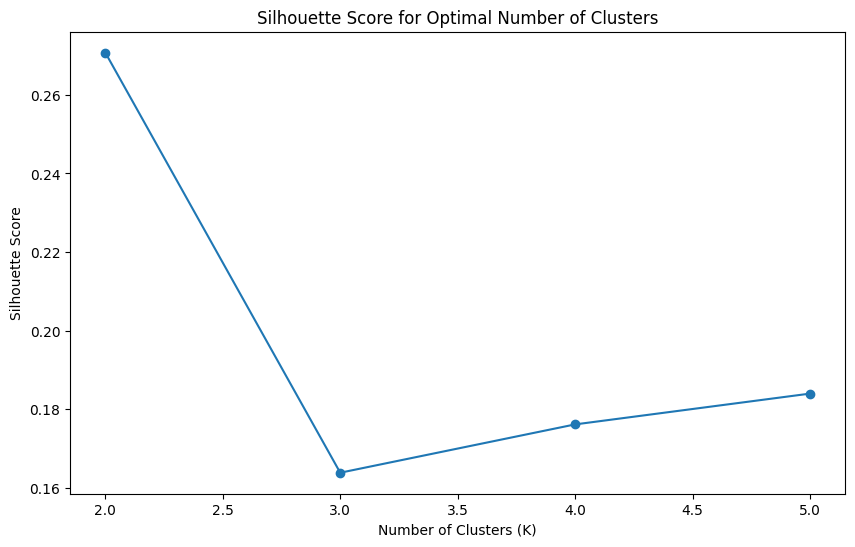

Optimal number of clusters based on Silhouette Score: 2


In [11]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ‚úÖ ◊ì◊í◊ô◊û◊î ◊®◊†◊ì◊ï◊û◊ú◊ô◊™ ◊©◊ú 50,000 ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊õ◊ì◊ô ◊ú◊ó◊°◊ï◊ö ◊ñ◊û◊ü ◊®◊ô◊¶◊î
sample_size = min(50000, df_kmeans_scaled.shape[0])
indices = np.random.choice(df_kmeans_scaled.shape[0], sample_size, replace=False)
df_sample = df_kmeans_scaled[indices]

# ‚úÖ ◊ó◊ô◊©◊ï◊ë Silhouette Score ◊¢◊ë◊ï◊® ◊¢◊®◊õ◊ô K ◊û-2 ◊¢◊ì 10
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_sample)
    score = silhouette_score(df_sample, cluster_labels)
    silhouette_scores.append(score)

# ‚úÖ ◊í◊®◊£ ◊ú◊î◊¶◊í◊™ Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# ‚úÖ ◊î◊¶◊í◊™ ◊û◊°◊§◊® ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊î◊ê◊ï◊§◊ò◊ô◊û◊ú◊ô ◊ú◊§◊ô Silhouette
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")


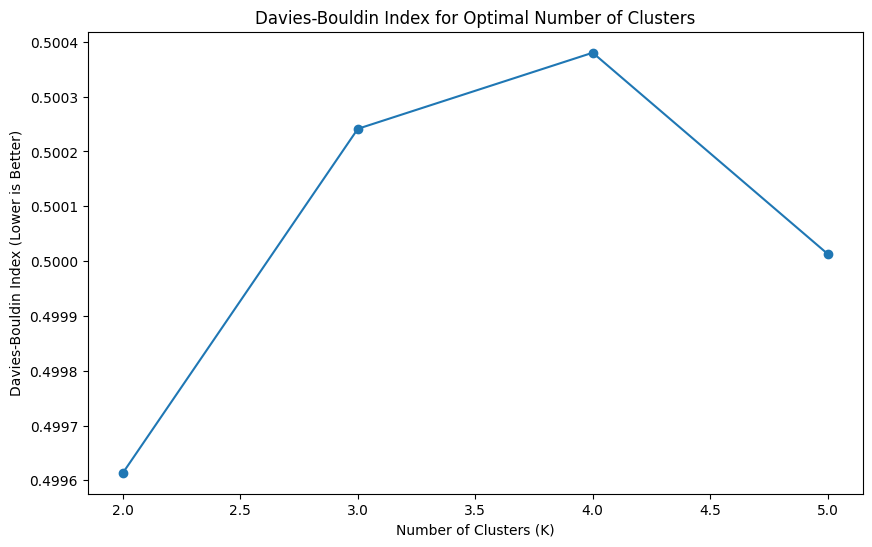

Optimal number of clusters based on Davies-Bouldin Index: 2


In [13]:
from sklearn.metrics import davies_bouldin_score

# ‚úÖ ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì Davies-Bouldin ◊¢◊ë◊ï◊® K=2 ◊¢◊ì 10
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_df)
    score = davies_bouldin_score(combined_df, cluster_labels)
    davies_bouldin_scores.append(score)

# ‚úÖ ◊í◊®◊£ ◊ú◊î◊¶◊í◊™ Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index (Lower is Better)')
plt.show()

# ‚úÖ ◊ß◊ë◊ô◊¢◊™ K ◊î◊ê◊ï◊§◊ò◊ô◊û◊ú◊ô ◊ú◊§◊ô ◊î◊û◊ì◊ì (◊†◊û◊ï◊ö ◊ô◊ï◊™◊® ◊ò◊ï◊ë ◊ô◊ï◊™◊®)
optimal_k_db = k_values[np.argmin(davies_bouldin_scores)]
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_k_db}")


In [15]:
from sklearn.cluster import DBSCAN

# ◊î◊®◊¶◊™ DBSCAN ◊¢◊ú ◊ì◊í◊ô◊û◊î
dbscan = DBSCAN(eps=1.0, min_samples=20)
dbscan_labels = dbscan.fit_predict(df_sample)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters detected by DBSCAN: {unique_clusters}")

Number of clusters detected by DBSCAN: 269


In [16]:
from sklearn.cluster import DBSCAN
import numpy as np

# ◊ë◊ì◊ô◊ß◊î ◊©◊ú ◊û◊°◊§◊® ◊¢◊®◊õ◊ô eps ◊ï◊î◊©◊§◊¢◊™◊ù
eps_values = [0.5, 1.0, 1.5, 2.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=20)
    dbscan_labels = dbscan.fit_predict(df_sample)
    unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    print(f"DBSCAN with eps={eps}: Number of Clusters Detected: {unique_clusters}")


DBSCAN with eps=0.5: Number of Clusters Detected: 102
DBSCAN with eps=1.0: Number of Clusters Detected: 269
DBSCAN with eps=1.5: Number of Clusters Detected: 100
DBSCAN with eps=2.0: Number of Clusters Detected: 42


In [ ]:
# ◊ë◊ì◊ô◊ß◊î ◊©◊ú ◊¢◊®◊õ◊ô eps ◊í◊ë◊ï◊î◊ô◊ù ◊ô◊ï◊™◊®
eps_values = [2.5, 3.0, 3.5, 4.0, 5.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=20)
    dbscan_labels = dbscan.fit_predict(df_sample)
    unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    noise_points = np.sum(dbscan_labels == -1)
    total_points = len(dbscan_labels)
    noise_percentage = (noise_points / total_points) * 100
    print(f"DBSCAN with eps={eps}: Number of Clusters: {unique_clusters}, Noise: {noise_percentage:.2f}%")


DBSCAN with eps=2.5: Number of Clusters: 7, Noise: 0.27%
DBSCAN with eps=3.0: Number of Clusters: 7, Noise: 0.01%
DBSCAN with eps=3.5: Number of Clusters: 2, Noise: 0.01%
DBSCAN with eps=4.0: Number of Clusters: 2, Noise: 0.00%


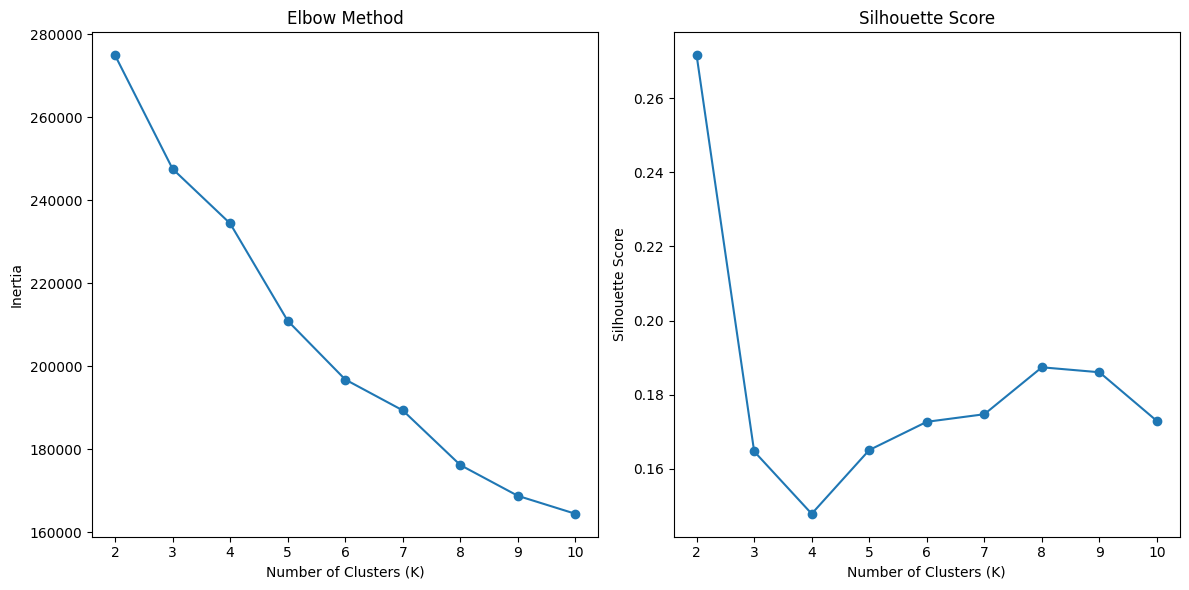

Silhouette Score for DBSCAN: -0.27707409472694233


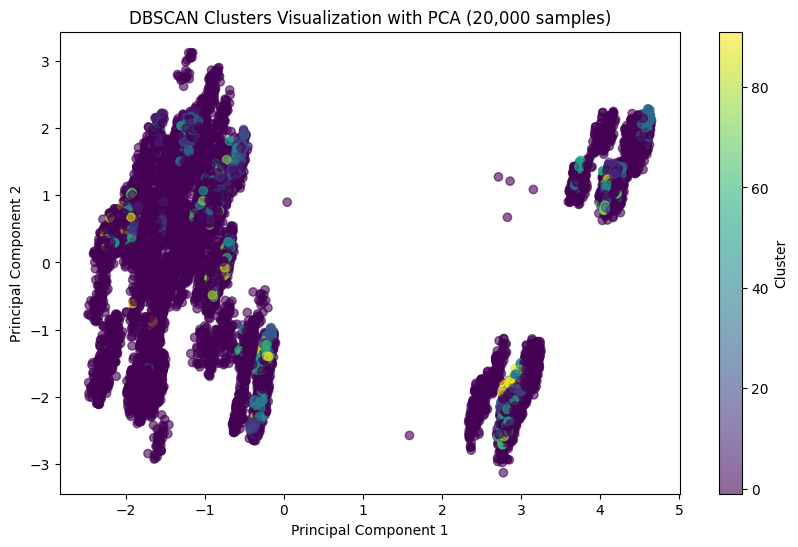

In [8]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# ‚úÖ ◊ì◊í◊ô◊û◊î ◊®◊†◊ì◊ï◊û◊ú◊ô◊™ ◊ú-20,000 ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ë◊ú◊ë◊ì ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊¢◊ï◊û◊° ◊ó◊ô◊©◊ï◊ë◊ô
sample_size = min(20000, df_kmeans_scaled.shape[0])
indices = np.random.choice(df_kmeans_scaled.shape[0], sample_size, replace=False)
df_sample = df_kmeans_scaled[indices]

# ‚úÖ ◊ë◊ì◊ô◊ß◊™ Elbow Method + Silhouette ◊¢◊ù ◊ì◊í◊ô◊û◊î ◊ß◊ò◊†◊î
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_sample)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# ‚úÖ ◊î◊¶◊í◊™ ◊í◊®◊£ Elbow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# ‚úÖ ◊î◊¶◊í◊™ ◊í◊®◊£ Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# ‚úÖ ◊ë◊ô◊¶◊ï◊¢ DBSCAN ◊¢◊ù ◊ì◊í◊ô◊û◊î ◊ß◊ò◊†◊î (20,000 ◊ì◊ï◊í◊û◊ê◊ï◊™)
dbscan = DBSCAN(eps=1.0, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_sample)

# ‚úÖ ◊ó◊ô◊©◊ï◊ë ◊°◊ô◊ú◊ï◊ê◊ò ◊¢◊ë◊ï◊® DBSCAN (◊ê◊ù ◊ñ◊ï◊î◊ï ◊ô◊ï◊™◊® ◊û◊ê◊©◊õ◊ï◊ú ◊ê◊ó◊ì)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_sample, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")
else:
    print("DBSCAN ◊ñ◊ô◊î◊î ◊®◊ß ◊ê◊©◊õ◊ï◊ú ◊ê◊ó◊ì ◊ê◊ï ◊©◊®◊ï◊ë ◊î◊ì◊í◊ô◊û◊ï◊™ ◊û◊°◊ï◊û◊†◊ï◊™ ◊õ◊®◊¢◊© (Noise).")

# ‚úÖ ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î ◊©◊ú DBSCAN ◊¢◊ù PCA (2 ◊®◊õ◊ô◊ë◊ô◊ù ◊ë◊ú◊ë◊ì)
pca = PCA(n_components=2)
df_pca_2d_dbscan = pca.fit_transform(df_sample)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d_dbscan[:, 0], df_pca_2d_dbscan[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clusters Visualization with PCA (20,000 samples)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

### ---- ◊©◊ú◊ë 1: K-Means ◊¢◊ú ◊õ◊ú ◊î◊ì◊ê◊ò◊î ----
optimal_k = 4  # ◊ë◊î◊™◊ë◊°◊° ◊¢◊ú ◊í◊®◊£ ◊î-Elbow ◊©◊ú◊ö
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_kmeans_scaled)

# ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì◊ô ◊î◊¢◊®◊õ◊î ◊ú-K-Means
kmeans_silhouette = silhouette_score(df_kmeans_scaled, kmeans_labels)
kmeans_db_index = davies_bouldin_score(df_kmeans_scaled, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index:.3f}")

# ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î ◊¢◊ù PCA ◊¢◊ë◊ï◊® K-Means
pca_kmeans = PCA(n_components=2)
df_pca_2d_kmeans = pca_kmeans.fit_transform(df_kmeans_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d_kmeans[:, 0], df_pca_2d_kmeans[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### ---- ◊©◊ú◊ë 2: DBSCAN ◊¢◊ú ◊ì◊í◊ô◊û◊î ◊û◊ï◊§◊ó◊™◊™ ----
sample_size = min(20000, df_kmeans_scaled.shape[0])
indices = np.random.choice(df_kmeans_scaled.shape[0], sample_size, replace=False)
df_sample = df_kmeans_scaled[indices]

# DBSCAN ◊¢◊ù ◊§◊®◊û◊ò◊®◊ô◊ù ◊û◊ï◊™◊ê◊û◊ô◊ù ◊ú◊†◊™◊ï◊†◊ô◊ù ◊í◊ì◊ï◊ú◊ô◊ù
dbscan = DBSCAN(eps=1.0, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_sample)

# ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì◊ô ◊î◊¢◊®◊õ◊î ◊¢◊ë◊ï◊® DBSCAN (◊®◊ß ◊ê◊ù ◊ô◊© ◊ô◊ï◊™◊® ◊û◊ê◊©◊õ◊ï◊ú ◊ê◊ó◊ì)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_sample, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(df_sample, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index:.3f}")
else:
    print("DBSCAN ◊ñ◊ô◊î◊î ◊®◊ß ◊ê◊©◊õ◊ï◊ú ◊ê◊ó◊ì ◊ê◊ï ◊©◊õ◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊°◊ï◊û◊†◊ï ◊õ◊®◊¢◊© (Noise).")

# ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î ◊¢◊ù PCA ◊¢◊ë◊ï◊® DBSCAN
pca_dbscan = PCA(n_components=2)
df_pca_2d_dbscan = pca_dbscan.fit_transform(df_sample)

plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d_dbscan[:, 0], df_pca_2d_dbscan[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clusters Visualization with PCA (20,000 samples)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### ---- ◊©◊ú◊ë 3: ◊°◊ô◊õ◊ï◊ù ◊™◊ï◊¶◊ê◊ï◊™ ----
print("\nüìä **◊°◊ô◊õ◊ï◊ù ◊û◊ì◊ì◊ô◊ù:**")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index:.3f}")
if len(set(dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index:.3f}")
else:
    print("DBSCAN ◊ú◊ê ◊ñ◊ô◊î◊î ◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊ë◊¶◊ï◊®◊î ◊û◊°◊§◊ß◊™.")


KeyboardInterrupt: 

In [4]:
# ◊ê◊ô◊û◊ï◊ü ◊û◊ï◊ì◊ú K-Means ◊¢◊ù ◊û◊°◊§◊® ◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊ê◊ï◊§◊ò◊ô◊û◊ú◊ô (K=4)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df_kmeans['Cluster'] = kmeans_final.fit_predict(df_kmeans_scaled)

# ◊î◊¶◊í◊™ ◊û◊°◊§◊® ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ù ◊™◊í◊ô ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™
print("Data with Cluster Labels:")
df_kmeans.head()

Data with Cluster Labels:


Year  Yeshuv  PoliceDistrict  PoliceMerhav  PoliceStation  StatisticArea  \
0  2020      50               3            19             50           1236   
1  2020      70               3            18             63            704   
2  2020      21               6             8             15            194   
3  2020      33               2            15             40            246   
4  2020      33               2            15             35           1080   

   StatisticGroup  StatisticType  Quarter_numeric   Quarter_sin   Quarter_cos  \
0              10             14                1  1.000000e+00  6.123234e-17   
1               3             97                2  1.224647e-16 -1.000000e+00   
2              10            121                4 -2.449294e-16  1.000000e+00   
3               4             27                2  1.224647e-16 -1.000000e+00   
4               9              1                2  1.224647e-16 -1.000000e+00   

   YeshuvCrimeRate  CrimeTrend  CrimeTrend_CrimeRate  StationCrimeRateAvg  \
0         0.596563    4.523112              0.553678             0.601860   
1         0.625726    4.523112              0.580618             0.631580   
2         0.266477    4.523112              0.248758             0.214669   
3         2.364671    4.523112              2.186987             2.424294   
4         2.364671    4.523112              2.186987             2.340074   

   YeshuvHistoricalCrimeRate  StationsNearbyCount  CityOrMoshav_Moshav  \
0                   0.596563              4.50001                False   
1                   0.625726              4.50001                False   
2                   0.266477              3.50001                 True   
3                   2.364671              2.00001                False   
4                   2.364671              2.00001                False   

   Cluster  
0        2  
1        2  
2        3  
3        1  
4        1

Davies-Bouldin Index for K=4: 1.9390606126381325


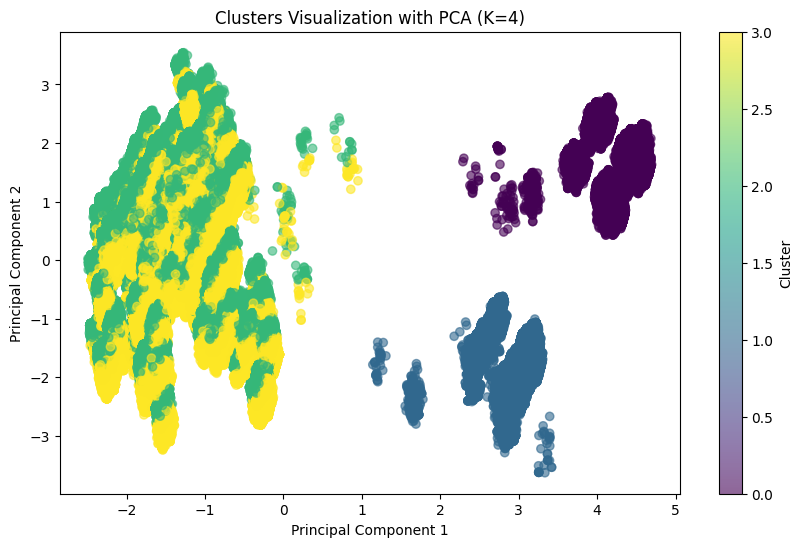

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# ◊ë◊ô◊¶◊ï◊¢ ◊ß◊ú◊ê◊°◊ò◊®◊ô◊†◊í ◊¢◊ù K=4 ◊ú◊§◊ô ◊í◊®◊£ ◊î◊û◊®◊§◊ß
kmeans_final = KMeans(n_clusters=4, random_state=42)
cluster_labels_final = kmeans_final.fit_predict(df_kmeans_scaled)

# ◊ó◊ô◊©◊ï◊ë Davies-Bouldin Index
db_index = davies_bouldin_score(df_kmeans_scaled, cluster_labels_final)
print(f"Davies-Bouldin Index for K=4: {db_index}")

# ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î ◊¢◊ù PCA ◊ú-2 ◊û◊ô◊û◊ì◊ô◊ù
pca = PCA(n_components=2)  # ◊î◊§◊ó◊™◊î ◊ú-2 ◊®◊õ◊ô◊ë◊ô◊ù ◊¢◊ô◊ß◊®◊ô◊ô◊ù
df_pca_2d = pca.fit_transform(df_kmeans_scaled)

# ◊¶◊ô◊ï◊® ◊ê◊©◊õ◊ï◊ú◊ï◊™
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=cluster_labels_final, cmap='viridis', alpha=0.6)
plt.title('Clusters Visualization with PCA (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


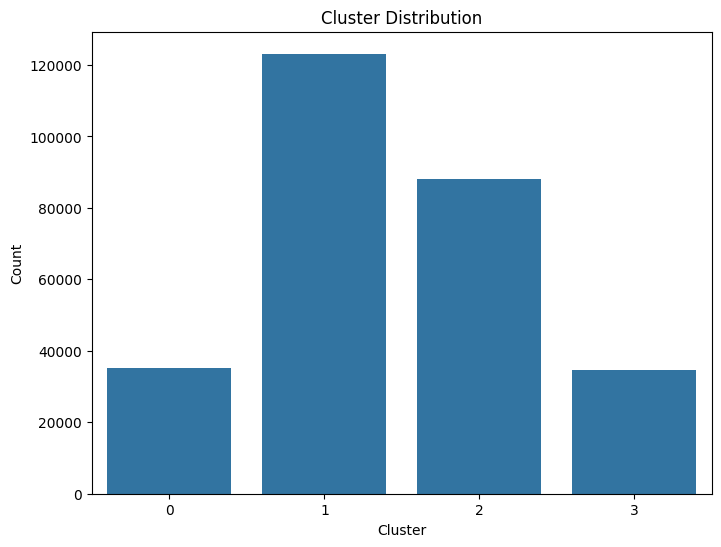

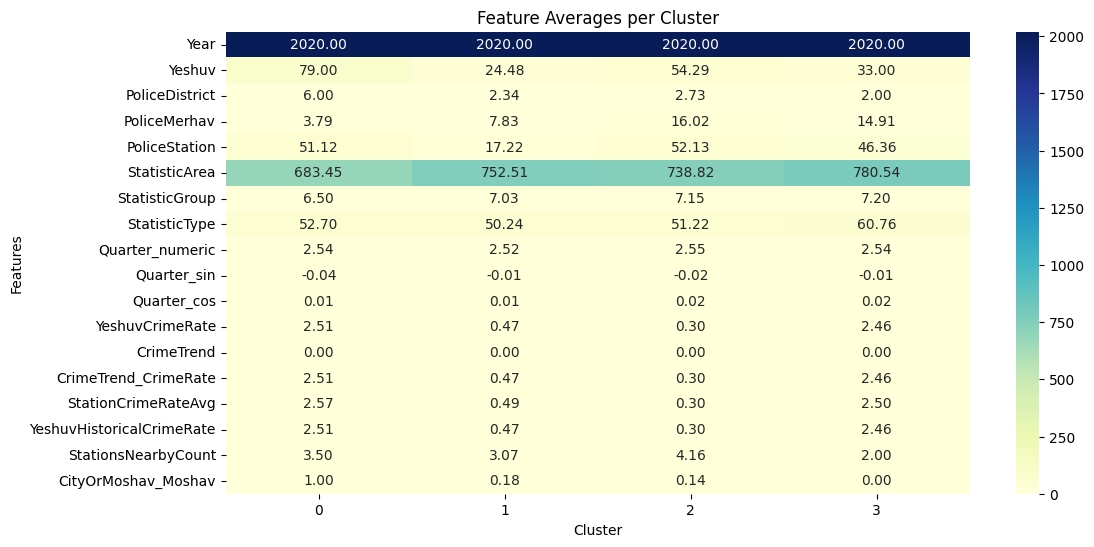

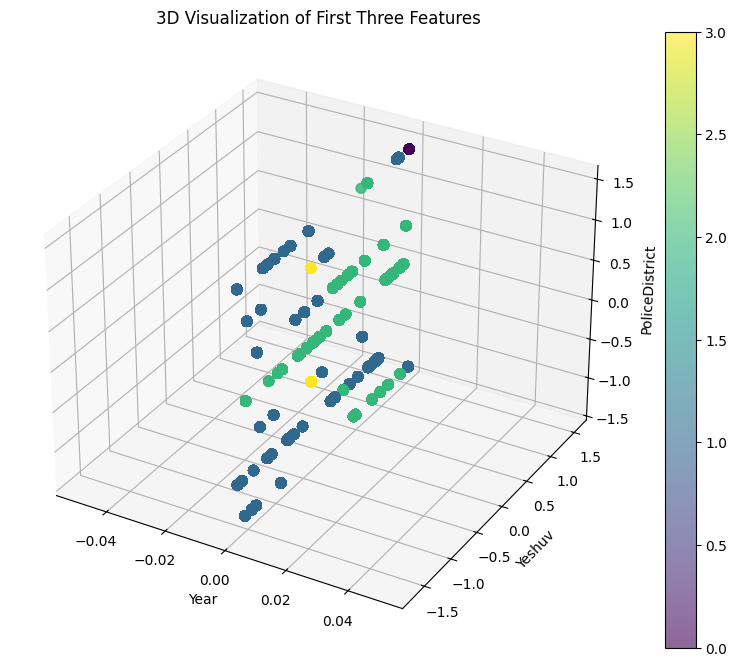

In [ ]:
import seaborn as sns

# ‚úÖ ◊î◊™◊§◊ú◊í◊ï◊™ ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_kmeans)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# ‚úÖ ◊û◊û◊ï◊¶◊¢ ◊û◊©◊™◊†◊ô◊ù ◊ú◊§◊ô ◊ê◊©◊õ◊ï◊ú
cluster_means = df_kmeans.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.transpose(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Feature Averages per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

# ‚úÖ ◊î◊ì◊û◊ô◊î ◊™◊ú◊™-◊û◊û◊ì◊ô◊™ ◊©◊ú 3 ◊î◊™◊õ◊ï◊†◊ï◊™ ◊î◊®◊ê◊©◊ï◊†◊ï◊™
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_kmeans_scaled[:, 0], df_kmeans_scaled[:, 1], df_kmeans_scaled[:, 2],
    c=combined_df['Cluster'], cmap='viridis', s=50, alpha=0.6
)
ax.set_title('3D Visualization of First Three Features')
ax.set_xlabel(df_kmeans.columns[0])
ax.set_ylabel(df_kmeans.columns[1])
ax.set_zlabel(df_kmeans.columns[2])
plt.colorbar(scatter)
plt.show()


In [ ]:
# ◊î◊í◊ì◊®◊™ ◊®◊©◊ô◊û◊ï◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊§◊ô ◊û◊î ◊©◊î◊í◊ì◊®◊™
categorical_cols = [
    'Year', 'Yeshuv', 'PoliceDistrict', 'PoliceMerhav', 'PoliceStation',
    'StatisticArea', 'StatisticGroup', 'StatisticType', 'Quarter_numeric', 'CityOrMoshav_Moshav'
]

cyclical_cols = ['Quarter_sin', 'Quarter_cos']

numeric_cols = [
    'YeshuvCrimeRate', 'CrimeTrend', 'CrimeTrend_CrimeRate',
    'StationCrimeRateAvg', 'YeshuvHistoricalCrimeRate', 'StationsNearbyCount'
]

# ‚úÖ ◊ó◊ô◊©◊ï◊ë ◊û◊û◊ï◊¶◊¢ ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊û◊°◊§◊®◊ô◊ï◊™ ◊ë◊ú◊ë◊ì
numeric_means = df_kmeans[numeric_cols].groupby(df_kmeans['Cluster']).mean()

# ‚úÖ ◊ó◊ô◊©◊ï◊ë ◊û◊û◊ï◊¶◊¢ ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊û◊ó◊ñ◊ï◊®◊ô◊ï◊™ (◊†◊ó◊©◊ë◊ï◊™ ◊û◊°◊§◊®◊ô◊ï◊™)
cyclical_means = df_kmeans[cyclical_cols].groupby(df_kmeans['Cluster']).mean()

# ‚úÖ ◊ó◊ô◊©◊ï◊ë ◊©◊õ◊ô◊ó (Mode) ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ï◊™ ◊ë◊ú◊ë◊ì
categorical_modes = df_kmeans[categorical_cols].groupby(df_kmeans['Cluster']).agg(lambda x: x.mode()[0])

# ‚úÖ ◊ê◊ô◊ó◊ï◊ì ◊õ◊ú ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊ú◊ò◊ë◊ú◊î ◊ê◊ó◊™ ◊û◊°◊ï◊ì◊®◊™
cluster_summary = pd.concat([numeric_means, cyclical_means, categorical_modes], axis=1)

# ‚úÖ ◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊ô◊©◊ô◊®◊ï◊™ ◊ë◊û◊ó◊ë◊®◊™ ◊¢◊ù Pandas
print("Cluster Summary (Numeric Means and Categorical Modes):")
display(cluster_summary)


Cluster Summary (Numeric Means and Categorical Modes):


YeshuvCrimeRate  CrimeTrend  CrimeTrend_CrimeRate  \
Cluster                                                      
0               2.512516         0.0              2.512516   
1               0.473803         0.0              0.473803   
2               0.295060         0.0              0.295060   
3               2.462061         0.0              2.462061   

         StationCrimeRateAvg  YeshuvHistoricalCrimeRate  StationsNearbyCount  \
Cluster                                                                        
0                   2.572608                   2.512516             3.500010   
1                   0.492446                   0.473803             3.070571   
2                   0.300572                   0.295060             4.160627   
3                   2.496758                   2.462061             1.999199   

         Quarter_sin  Quarter_cos  Year  Yeshuv  PoliceDistrict  PoliceMerhav  \
Cluster                                                                         
0          -0.035088     0.011375  2020      79               6             0   
1          -0.010411     0.005847  2020       8               1            13   
2          -0.024181     0.016223  2020      69               3            19   
3          -0.014885     0.021198  2020      33               2            15   

         PoliceStation  StatisticArea  StatisticGroup  StatisticType  \
Cluster                                                                
0                   36            866               4             23   
1                    7            833              10             14   
2                   63           1479              10             14   
3                   40           1361              10              1   

         Quarter_numeric  CityOrMoshav_Moshav  
Cluster                                        
0                      3                 True  
1                      4                False  
2                      4                False  
3                      4                False

In [ ]:
df_kmeans

Year  Yeshuv  PoliceDistrict  PoliceMerhav  PoliceStation  \
0       2020      49               3            19             50   
1       2020      69               3            18             63   
2       2020      21               6             8             15   
3       2020      33               2            15             40   
4       2020      33               2            15             35   
...      ...     ...             ...           ...            ...   
281133  2020       8               0            13              7   
281134  2020      72               3            18             66   
281135  2020      14               6             0             12   
281136  2020      75               3            19             32   
281137  2020      33               2            16             70   

        StatisticArea  StatisticGroup  StatisticType  Quarter_numeric  \
0                1209              10             14                1   
1                 681               3             87                2   
2                 186              10            110                4   
3                 235               4             25                2   
4                1053               9              1                2   
...               ...             ...            ...              ...   
281133            398               9              1                3   
281134            193               9              1                2   
281135            139               9              1                1   
281136            467              10            112                1   
281137           1361              10            110                1   

         Quarter_sin   Quarter_cos  YeshuvCrimeRate  CrimeTrend  \
0       1.000000e+00  6.123234e-17         0.577090         0.0   
1       1.224647e-16 -1.000000e+00         0.597588         0.0   
2      -2.449294e-16  1.000000e+00         0.287260         0.0   
3       1.224647e-16 -1.000000e+00         2.462061         0.0   
4       1.224647e-16 -1.000000e+00         2.462061         0.0   
...              ...           ...              ...         ...   
281133 -1.000000e+00 -1.836970e-16         1.175385         0.0   
281134  1.224647e-16 -1.000000e+00         0.310911         0.0   
281135  1.000000e+00  6.123234e-17         0.487145         0.0   
281136  1.000000e+00  6.123234e-17         0.110882         0.0   
281137  1.000000e+00  6.123234e-17         2.462061         0.0   

        CrimeTrend_CrimeRate  StationCrimeRateAvg  YeshuvHistoricalCrimeRate  \
0                   0.577090             0.589588                   0.577090   
1                   0.597588             0.610413                   0.597588   
2                   0.287260             0.242119                   0.287260   
3                   2.462061             2.525477                   2.462061   
4                   2.462061             2.423307                   2.462061   
...                      ...                  ...                        ...   
281133              1.175385             1.204044                   1.175385   
281134              0.310911             0.316215                   0.310911   
281135              0.487145             0.497212                   0.487145   
281136              0.110882             0.146076                   0.110882   
281137              2.462061             2.525477                   2.462061   

        StationsNearbyCount  CityOrMoshav_Moshav  Cluster  
0                   4.50001                False        2  
1                   4.50001                False        2  
2                   3.50001                 True        1  
3                   2.00001                False        4  
4                   2.00001                False        4  
...                     ...                  ...      ...  
281133              3.00001                False        3  
281134              4.50001                False        

In [ ]:
df_kmeans.groupby('Cluster')['YeshuvCrimeRate'].mean()


Cluster
0    2.512516
1    0.229975
2    0.300148
3    0.715565
4    2.462061
Name: YeshuvCrimeRate, dtype: float64

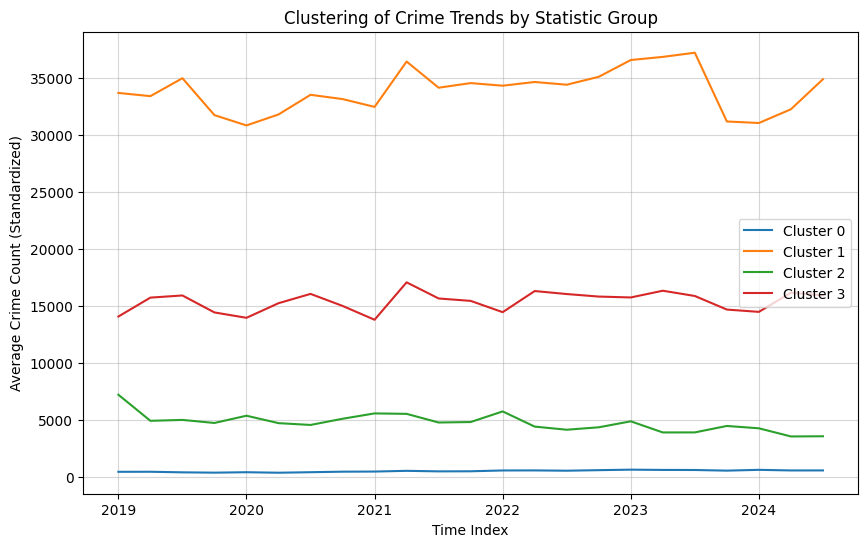

In [ ]:
# # Clustering with K-Means
# kmeans = KMeans(n_clusters=4, random_state=42)
# clusters = kmeans.fit_predict(crime_pivot_scaled)

# # Add cluster labels to the original StatisticGroup data
# crime_pivot['Cluster'] = clusters



# # Visualization: Clustering Results
# plt.figure(figsize=(10, 6))
# for cluster in range(kmeans.n_clusters):
#     cluster_data = crime_pivot[crime_pivot['Cluster'] == cluster]
#     plt.plot(cluster_data.columns[:-2], cluster_data.iloc[:, :-2].mean(axis=0), label=f'Cluster {cluster}')

# plt.title('Clustering of Crime Trends by Statistic Group')
# plt.xlabel('Time Index')
# plt.ylabel('Average Crime Count (Standardized)')
# plt.legend()
# plt.grid(alpha=0.5)
# plt.show()



Clusters Overview:
Cluster 0 (Blue Line):

Represents statistic groups with the lowest crime counts over the entire period.
These groups remain consistently low and do not show significant variation over time.
Possible examples: Rare or less-reported crime types.
Cluster 1 (Orange Line):

Represents statistic groups with the highest crime counts.
Shows consistent activity over time but has notable peaks and dips:
The dip in 2020 aligns with COVID-19.
The drop in 2023 corresponds to the Israeli war.
Likely includes high-frequency crimes such as theft or property-related offenses.
Cluster 2 (Green Line):

Represents statistic groups with moderate but lower counts compared to Cluster 1.
The trend is relatively stable, with slight fluctuations.
Possible examples: Crimes that occur periodically, such as fraud or vandalism.
Cluster 3 (Red Line):

Represents statistic groups with medium-to-high crime counts.
Fluctuations are more prominent compared to Cluster 2, suggesting greater variability in occurrence.
Potentially includes crime types influenced by specific events or seasonal factors, such as violent crimes or drug-related offenses.
Key Insights:
Cluster 1 (Orange Line):

Dominates the overall trend, highlighting that a few statistic groups account for the majority of crimes.
Drops during major disruptions (COVID-19, war) suggest these are crimes dependent on normal societal activity (e.g., theft).
Cluster 3 (Red Line):

Fluctuations indicate these crimes might be more sensitive to external factors or enforcement actions.
Cluster 2 and Cluster 0:

Remain relatively stable and low, reflecting crimes that are either rare (Cluster 0) or less influenced by external events (Cluster 2).
How to Use This Insight:
Prioritize Resources:

Focus law enforcement efforts on statistic groups in Cluster 1 due to their high volume.
Monitor Cluster 3 for patterns that might indicate emerging risks.
Analyze Events:

Dive deeper into statistic groups in Clusters 1 and 3 to understand what causes their trends (e.g., policy changes, holidays, or major events).

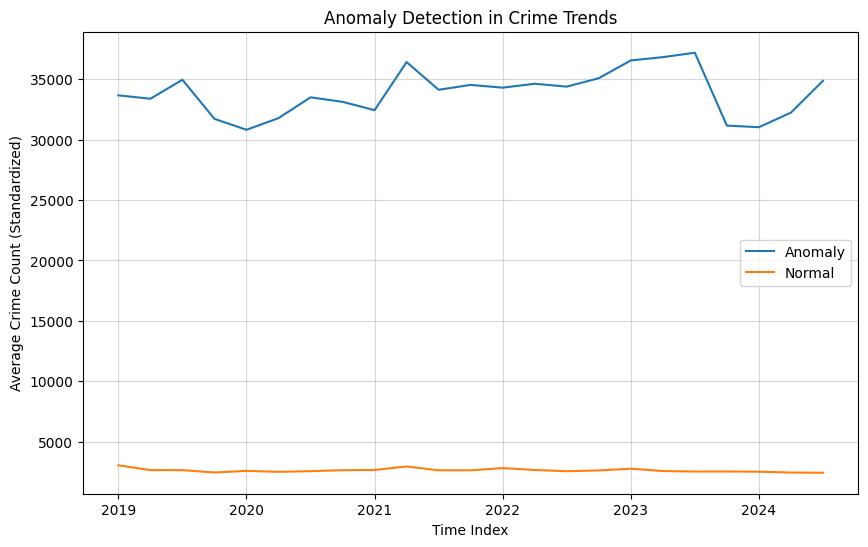

In [ ]:
# Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination=0.1)
anomalies = iso_forest.fit_predict(crime_pivot_scaled)
crime_pivot['Anomaly'] = anomalies
# Visualization: Anomalies
plt.figure(figsize=(10, 6))
for anomaly in [-1, 1]:
    anomaly_data = crime_pivot[crime_pivot['Anomaly'] == anomaly]
    anomaly_label = 'Anomaly' if anomaly == -1 else 'Normal'
    plt.plot(anomaly_data.columns[:-2], anomaly_data.iloc[:, :-2].mean(axis=0), label=anomaly_label)

plt.title('Anomaly Detection in Crime Trends')
plt.xlabel('Time Index')
plt.ylabel('Average Crime Count (Standardized)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


COVID-19 in 2020:
Decreased Crime Rates:

During COVID-19 lockdowns, restrictions on movement likely reduced opportunities for crimes such as theft, burglary, and street violence.
Many countries observed similar declines in crime rates during the pandemic.
Possible Impact on the Graph:

The drop in anomalies around 2020 aligns with this period.
This suggests a reduction in unusual spikes in crime, likely due to the overall decrease in criminal activities during the pandemic.
Israel War (October 7, 2023):
Decreased Crime Rates During Conflict:

During wartime, the focus shifts to survival and defense, and normal societal activities are disrupted.
Law enforcement and public resources are often redirected toward managing the crisis, potentially reducing reported crimes like theft and public order violations.
Impact Seen in the Graph:

A sharp drop in anomalies around late 2023 matches the war's timeline.
This could indicate:
Fewer reported crimes during this time due to disrupted normal life.
The population and authorities focusing on safety and survival rather than everyday criminal¬†activities.

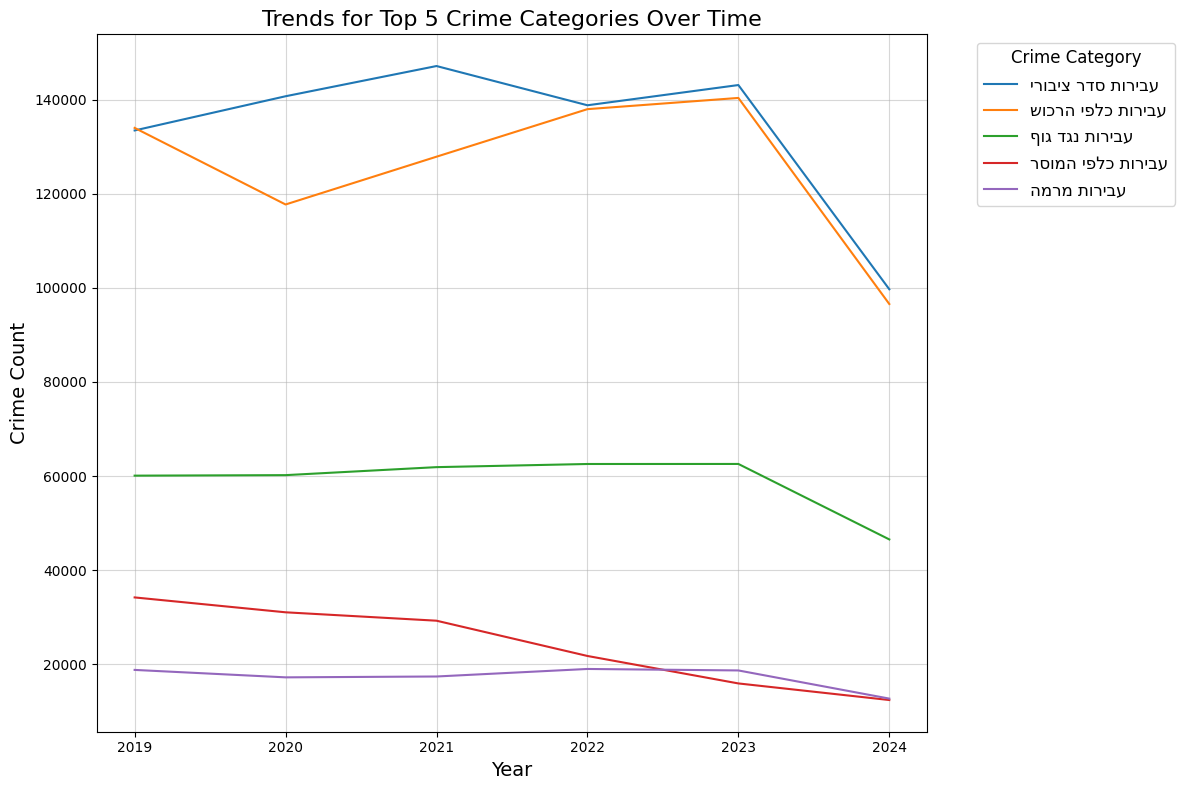

In [ ]:
#!pip install python-bidi

import matplotlib.pyplot as plt
from bidi.algorithm import get_display  # Corrects text orientation
from matplotlib import rcParams
from matplotlib import font_manager

# Set font that supports Hebrew and configure matplotlib
rcParams['font.family'] = 'DejaVu Sans'
rcParams['axes.unicode_minus'] = False

# Correcting the mirrored Hebrew using `bidi`
top_categories_display = [get_display(category) for category in top_categories]

# Replot the graph with fixed labels
plt.figure(figsize=(12, 8))

for category, category_display in zip(top_categories, top_categories_display):
    category_data = top_category_trends[top_category_trends['StatisticGroup'] == category]
    plt.plot(category_data['Year'], category_data['CrimeCount'], label=category_display)

# Customize the plot
plt.title(get_display('Trends for Top 5 Crime Categories Over Time'), fontsize=16)
plt.xlabel(get_display('Year'), fontsize=14)
plt.ylabel(get_display('Crime Count'), fontsize=14)
plt.legend(
    title=get_display('Crime Category'),
    fontsize=12,
    loc='upper left',
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1)
)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


